### Взял для примерчика 7 "самых популярных"

In [1]:
import requests
import json
import sqlite3
from bs4 import BeautifulSoup
import sqlite3
import nltk
import gensim
import requests
from collections import Counter
from math import pi
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns
import numpy as np
matplotlib.style.use('ggplot')
from collections import OrderedDict

In [2]:
filtered_db = 'C:\\Users\\ДНС\\Desktop\\data_set.db'

conn = sqlite3.connect(filtered_db)
cursor = conn.cursor()

cursor.execute('SELECT * from vacancies')
filtered = cursor.fetchall()
conn.close()

#### Пока здесь гистограммы, лучше сделать графики

In [12]:
qual = ['sql', 'python', 'java', 'git','javascript', 'windows', 'linux']

In [23]:
main_list = []
for i in qual:
    new = []
    for j in filtered:
        if i in j[5].lower():
            new.append(j[4][5:7])
    new = sorted(new)
    main_list.append(new)
main_list

[['01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '01',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',
  '02',


In [24]:
count_list = []
for i in main_list:
    count_list.append(Counter(i))

In [26]:
count_list

[Counter({'01': 77,
          '02': 89,
          '03': 70,
          '04': 48,
          '05': 28,
          '06': 24,
          '07': 16,
          '08': 23,
          '09': 29,
          '10': 24,
          '11': 23,
          '12': 8}),
 Counter({'01': 43,
          '02': 41,
          '03': 26,
          '04': 26,
          '05': 28,
          '06': 16,
          '07': 16,
          '08': 20,
          '09': 20,
          '10': 17,
          '11': 24,
          '12': 3}),
 Counter({'01': 58,
          '02': 68,
          '03': 62,
          '04': 48,
          '05': 25,
          '06': 27,
          '07': 12,
          '08': 19,
          '09': 18,
          '10': 11,
          '11': 18,
          '12': 10}),
 Counter({'01': 63,
          '02': 54,
          '03': 46,
          '04': 42,
          '05': 28,
          '06': 25,
          '07': 11,
          '08': 17,
          '09': 21,
          '10': 17,
          '11': 17,
          '12': 5}),
 Counter({'01': 17,
          '02':

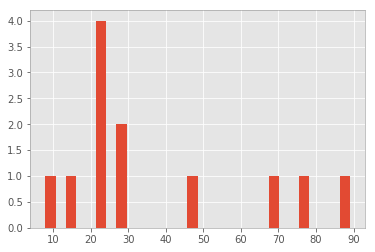

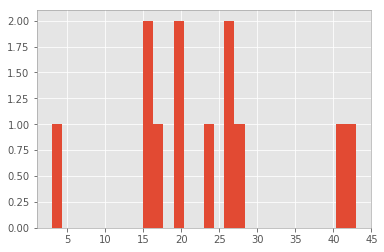

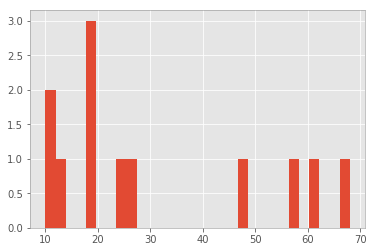

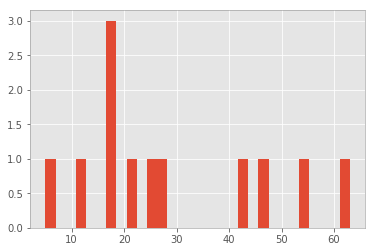

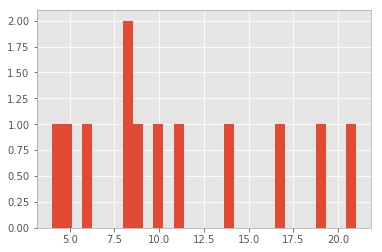

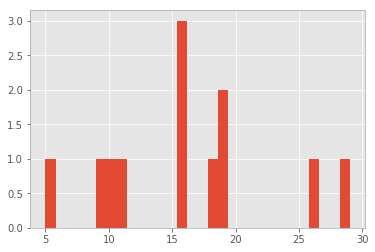

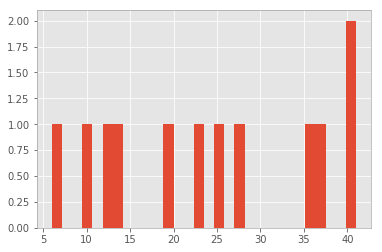

In [33]:
for dict in count_list:
    
    data = list(dict.values())
    plt.hist(data, bins=30)
    plt.show()

#### Дальше радиальная диаграмма

#### [('sql', 210), ('python', 210), ('java', 172), ('git', 154), ('javascript', 138), ('windows', 125), ('linux', 117)]

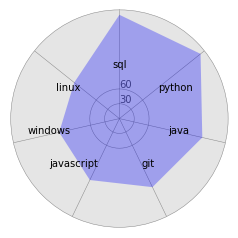

In [11]:
# Вносим данные - какие скиллы хотим видеть
cat = ["sql", "python", "java","git",'javascript','windows','linux']
values = [210,210,172,154,138,125,117]

N = len(cat)

x_as = [n / float(N) * 2 * pi for n in range(N)]

# Связываем последнее значение с первым чтобы построить радиальный график
values += values[:1]
x_as += x_as[:1]

# Устанавливаем цвет и толщину линий
plt.rc('axes', linewidth=0.5, edgecolor="#888888")

# Создаем диаграмму
ax = plt.subplot(111, polar=True)

# Устанавливаем стили для сетки
ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

# Убираем стандартные метки
plt.xticks(x_as[:-1], [])

# Выводим шаг значения на график
plt.yticks([30, 60], ["30", "60"])

# Берем данные для диаграммы
ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)

# Заполняем область под значениями
ax.fill(x_as, values, 'b', alpha=0.3)

# Ограничиваем области
plt.ylim(0, 220)

# Отрисовываем все элементы
for i in range(N):
    angle_rad = i / float(N) * 2 * pi

    if angle_rad == 0:
        ha, distance_ax = "center", 10
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 1
    elif angle_rad == pi:
        ha, distance_ax = "center", 1
    else:
        ha, distance_ax = "right", 1

    ax.text(angle_rad, 100 + distance_ax, cat[i], size=10, horizontalalignment=ha, verticalalignment="center")


# Показываем итоговую диаграмму
plt.show()